## Exploring the relationship of gender, crime and punishment in the late 18th Century England (1750-1799)
### Using the Proceedings of the Old Bailey Digital Archive 
#### This notebook was built in Python 3.7.7 
---------------------------------------------------------------------------------
### Project background and research questions
For Britain, a lot of things happened in the 18th century that changed the course of human history, one of these was the industrial revolution. The project focusses on crime during industrial revolution. There is no universal academic consensus on exactly when it occurred and its definition but for Britain, it started at around 1760 till the mid 19th century (Deane, 1979). The critical characteristics in the early stages of industrial revolutions were the changes in productions of goods, from human to machines and an increase use of steam power (e.g. Hudson, 2014). These features also caused repercussions in societies, such as child-labour, poverty and gender inequality. There has been countless research on the industrial revolution, its definition and its impacts but they are beyond the scope of this project. In this project, we will focus on gender equality in the late 18th century, when the industrial revolution was still in its infancy.
There are few angles that can be used to investigate gender (in)equality such as law and justice system, labourers' treatments and the participation in the public decisions. Utilizing the criminal trial records from the Proceedings of the Old Bailey Digital Archive (https://www.oldbaileyonline.org//), this project aims to tackle the gender question from a law/justice perspective. The questions that this project will focus on are:
##### -In the dawn of the industrial revolution (late 18th century), can we see a difference on how male and female defendants were treated in the court in terms of verdict and sentence? Were the whole-male judicial system favoured male defendant over female (Kermode and Walker, 2004)? Did it change through the time period being investigated?
##### -Is there any pattern in the range of crime committed by male and female? Can this shed lights on the gender roles in the 18th century England?


#### The background of the Proceedings of the Old Bailey
The Old Bailey, which is also known as London Central Criminal Court, is located near northwest of St. Paul’s. It has remained as a courtroom since the 16th century till now. The Proceedings are compiled of accounts of trials taken place in the Old Bailey. The earliest proceedings identified can be traced back to 1674. It is interesting that the early form of proceeding publication were not published officially. The publications were driven by commercial markets (Old Bailey, n.d.;Shoemaker,2008). From the 16th century, the life of criminals started to be published as entertaining tabloids/chapbooks. This inexpensive reading/leisure hit a wide audience, followed by a bloom of criminal literatures (Devereaux, 1996). Hence, this market demanded the formats of the proceedings to keep changing to attract more readers in order to gain the most commercial profit. This trend continued till the mid 18th century, when the City started to intervene. The City suggested that they wanted the proceedings to be published in a more truthful and fair narrative instead of simply being sensational and judgemental(Old Bailey, n.d.). From 1787, the Proceedings had disappeared from the commercial market and were fully under the control of the City till 1913. 

The Old Bailey Proceedings from 1674 to 1913 now are fully available online, searchable and digitised by the project "The Old Bailey Proceedings Online". All the materials are free of charge for non-commercial use only. The xml files and data using the Old Bailey API are made available to re-use under a Creative Commons Attribution-NonCommercial4.0 International (CC-BY-NC 4.0) license. (Details: https://www.oldbaileyonline.org/static/Legal-info.jsp)

The Old Bailey Proceedings digital archive is a treasure trove for researchers. The database contains an enormous information such as the political, social-economic contexts, gender roles, criminal justice systems in England and the uses of English language in different eras. 
### Project design overview

This project will analyse all the trial records int the database between 1750 and 1799 (the early stage of industrial revolution). The project can be divided into three parts.
The first part is data collection: 1. obtain the trial records (in the form of XML) from the database in this time period and clean the dataset Ready for the data analysis. 2. scraping the information needed from XML for further analysis, such as each case's date, defendant gender, charged crimes, verdict and punishment. Using summary statistics and visualization, the second part is analysing the relationships between variables with the focus on gender. The third part is text analysis with the focus on the length of words in the trial records, TF-IDF (term frequency-inverse document frequency) and sentiment analysis. All the details will be addressed in each part and in the discussion.


### Part 1: Data Sourcing and Cleaning

The query UI of the Old Bailey provides access and offers the data in human readable formats from the digital archive (https://www.oldbaileyonline.org//forms/formMain.jsp). However, the information retrieved is restricted and not easy to scrape. Hence, in this project, we decide to explore the API of the database. 
The Old Bailey database API offers two approaches to acquire trial records: Query URL and Zip URL. For Zip URL, the API allows us to download zip files of 10 trials each. For query URL, the API allows us to return a JSON object describing the fields which were queried and a list of case ids, which is no more than 1000 ids per page. The JSON object also contains a frequency table (on the field we queried). The ids acquired are then used to access each individual trial record through URL.
Both methods have some caveats, in this project it was decided to use the query URL approach. The reason is simple. In the pilot stage of this project, we started from querying and scraping 1 xml/trial record, and then expanded to 100 and 1000 xmls. It is easier to use query URL method since everything can be stored in the memory. We can also skip the troubles of downloading, opening and unzipping the files. However, with scaling up to more than 1000, there are not much difference between two methods in terms of time. The one benefit still lies in avoiding dealing with zip file.

##### README

In [1]:
#Due to the large size of the dataset used, this variable toggles between obtaining a small test set of data and the full 28,120 records
#Please be aware that the full dataset takes about 4 hours to download and 300MB's of space of storage
#The small dataset takes about <1 minutes to download. 
#When set to False only 93 cases are retrieved from the API but the full 28,120 cases are used in the rest of the notebook for analysis
#By default it is set to use the small dataset
use_full_dataset = False

In [2]:
import urllib.request, json # to call the API and parse the API return

#The base_url is generated from the  Old Bailey API query demonstrator page (link:https://www.oldbaileyonline.org/obapi/)
#The base_url will be the part that can stay the same in the whole notebook. 
#It contains the informatinon on the query field (here, we can see the start date and end date).
#The only thing we have to change is the start of the item (&start)
if use_full_dataset == True:
    base_url="https://www.oldbaileyonline.org/obapi/ob?term0=fromdate_17500117&term1=todate_17991204&breakdown=offcat&&count=1000&inputFormat=OBapiSearchJson&start="
else:
    base_url='https://www.oldbaileyonline.org//obapi/ob?term0=fromdate_17530607&term1=todate_17530718&&count=100&inputFormat=OBapiSearchJson&start='

#We are making the first request to the API to get how many cases available
with urllib.request.urlopen(base_url) as url:
#To convert the JSON String document into the Python dictionary.
    response_json = json.loads(url.read().decode())
#This json object contains total numbers of case trials available
#The hits value contains a list of trial ids
response_json

{'total': 93,
 'hits': ['t17530607-1',
  't17530607-2',
  't17530607-3',
  't17530607-4',
  't17530607-5',
  't17530607-6',
  't17530607-7',
  't17530607-8',
  't17530607-9',
  't17530607-10',
  't17530607-11',
  't17530607-12',
  't17530607-13',
  't17530607-14',
  't17530607-15',
  't17530607-16',
  't17530607-17',
  't17530607-18',
  't17530607-19',
  't17530607-20',
  't17530607-21',
  't17530607-22',
  't17530607-23',
  't17530607-24',
  't17530607-25',
  't17530607-26',
  't17530607-27',
  't17530607-28',
  't17530607-29',
  't17530607-30',
  't17530607-31',
  't17530607-32',
  't17530607-33',
  't17530607-34',
  't17530607-35',
  't17530607-36',
  't17530607-37',
  't17530607-38',
  't17530607-39',
  't17530607-40',
  't17530607-41',
  't17530718-1',
  't17530718-2',
  't17530718-3',
  't17530718-4',
  't17530718-5',
  't17530718-6',
  't17530718-7',
  't17530718-8',
  't17530718-9',
  't17530718-10',
  't17530718-11',
  't17530718-12',
  't17530718-13',
  't17530718-14',
  't17

In [3]:
#set a variable for total numer of trials in this time period for further querying
total_trials=response_json['total']
total_trials

93

In [4]:
#create an empty list to hold the id lists requested from API (through json)
id_list=[]
#We iterate 1000 cases in each API call for total of number cases (28120 cases for the full dataset). 
for x in range(0,total_trials,1000):
    #We make a request to the API to retrieve the list of case_id.
    with urllib.request.urlopen(base_url+ str(x)) as url:
        data = json.loads(url.read().decode())
        id_list += data['hits']

In [5]:
#check if the number of id list scraping from json is the same or not as the total we got
len(id_list)

93

***Notice***

As we can see, the total case numbers are 28120. This means that the time taken to query the API for all 28,000 cases is quite high (at least 4 hours) and it was evaluated whether the number of cases returned could be reduced by: (1) only looking at one crime type. However, the crime types are unevenly distributed as it is shown by the breakdown values in the cell above. If we ignore the theft crime, it will be quicker to call the API. However, it is the majority of committed crime, then we will lose the best opportunities to compare the verdict and punishment for both man and woman under the same charge. (2) shorter period of time. There are many crimes in one year. If we narrow down the time period, we also lose perspective on how things had changed. To get the full dataset takes a while but gives us a good range of data to evaluate. When running this notebook you can skip the cell below and start from cell after title "Data cleaning (I): missing value and datatype" which will load the full 28,000 rows of data from a csv saved in “/data/df_crime_original.csv”.

In [6]:
import requests # to call the API
import time # for pausing between each API call
from datetime import datetime #mark the time when it finishes 1000 request

#iterating through the whole id_list
for x in range(0,len(id_list)):
    #error handling: use try and except any possible errors during request
    try:
        #We use each unique URL to retrieve the page containing the case XML
        response=requests.get('https://www.oldbaileyonline.org/obapi/text?div='+ id_list[x])
        #save it into data folder with id list as its filename
        #If the response status code is 200, it meant the request is successful
        if response.status_code ==200:
            #response.text should contain a complete XML document and we will save them locally
            filename='data/'+id_list[x]+'.xml'
            with open(filename, 'w') as f:
                f.write(response.text)
    except Exception as e:
        print(repr(e)) #if the request encounters and error then this code will handle it, write the error to the output cell and continue processing the other URL's
        print("Failed:"+id_list[x]) #print out the case that failed to make the requests
        print(response.status_code) #print out the status codde for the files that failed to make requests to identify
                                    #the errors
   
    #after iterating through every 1000 sample, we will return the finish time stamp to tack the progress.
    if x % 1000 == 0: 
        print ("It is the {}th case".format(x))
        print (str(datetime.now()))
    
    #pausing between each request to avoid overwhelm the server
    time.sleep(0.5)

It is the 0th case
2021-01-11 09:43:16.446976


In [7]:
#create a function that can be used to parse through XML and scrape the information we need 
def extrat_crime_info(root):
    
    #set the original variable with none, incase there is missing value 
    #e.g. some records do not have a punishment subcategory
    trial_id= None
    trial_id= None
    crime_date= None
    offence_category= None
    offence_subcategory= None
    defendant_age = None
    defendant_gender= None
    verdict_category= None
    punishment_category= None
    punishment_subcategory= None
    
    #We iter through all the sub tree with tag of "div1"
    for crime_case in root.iter('div1'):
    #.get() accesses the element’s attributes
    #if the attribue "type" is equal to "trialAccount"
        if crime_case.get('type')=="trialAccount":
            # then we access the attribute "id" and store its value as a varaible
            trial_id=crime_case.get('id')
            break # once get the trial_id, break the loop before it iter through next 'div1' (if there is one)
       
    
    #Iterate through all the child elements to find each piece of required information
    #We first iterate through the child elements with the tag of "interp"
    #Under this element, we will retrieve the information on when the trial happened 
    #  ,the crimes that the defendants were charged with, verdict and punishment

    for detail in root.iter('interp'):
        #under interp element, access first attribute "type"
        criteria=detail.get('type')
        #This information is when the trial is taken palce
        if criteria=="date":
            crime_date=detail.get('value')
        if criteria=='offenceCategory':
            offence_category = detail.get('value')
        if criteria=='offenceSubcategory':
            offence_subcategory = detail.get('value')
        if criteria=="verdictCategory":
            verdict_category=detail.get('value')
            if verdict_category =='notGuilty':
                break # if the verdict category is notguilty, break the loop before it iter through next 'interp' 
                      # with notguilty category, there will be no punishmentcategory
        
        #if the verdict category is guilty, then we continue to collect punishment categories. 
        if criteria=='punishmentCategory':
            punishment_category = detail.get('value')
        if criteria=='punishmentSubcategory':
            punishment_subcategory = detail.get('value')
    
    #Iterate through all persName elements to find the gender and age of each defendant
    for people in root.iter('persName'):
        if people.get('type')=="defendantName":
            for defendant in people.iter('interp'):
                #if the attribute "type" is gender
                if defendant.get('type')=='gender':
                    defendant_gender= defendant.get('value')
                if defendant.get('type')=='age':
                    defendant_age= defendant.get('value')
    

                    
    return trial_id, crime_date, offence_category, offence_subcategory, defendant_gender, defendant_age, verdict_category, punishment_category, punishment_subcategory 

In [8]:
import os 
import pandas as pd
import xml.etree.ElementTree as ET # formatting XML in a tree structure to represent hierarchial data

#give a path of where the xmls retrieved earlier from the API are stored
path = "data/"

#empty list soon-to-be dataframe
crime_data=[]

#iterate through the files in the path
for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue     # only get the xml file
    #This joins the path for each file it finds so that python knows the full path / filename to trigger parser 
    fullname = os.path.join(path, filename)
    #use try and except incase there are problems in the xml files
    try:
        tree = ET.parse(fullname) #import the data by reading through the file
        root = tree.getroot() #get the root element
        #use the function to parse through the xml and assign the varaibles
        trial_id, crime_date, offence_category, offence_subcategory, defendant_gender, defendant_age, verdict_category, punishment_category, punishment_subcategory  = extrat_crime_info(root)
        # append row to the list
        crime_data.append([trial_id, crime_date, offence_category, offence_subcategory, defendant_gender, 
                           defendant_age, verdict_category, punishment_category, punishment_subcategory ])
    except:
        print ("Failed "+filename) #print out the filenames that are failed in parsing

In [9]:
#build the dataframe from the list
df_crime_xml = pd.DataFrame(crime_data, columns=['trial_id','crime_date','offence_category','offence_subcategory',
                                             'defendant_gender','defendant_age','verdict_category', 'punishment_category', 
                                             'punishment_subcategory' ])
df_crime_xml # print the dataset

df_crime_xml.to_csv(r'data/df_crime_xml.csv')#save the csv

In [10]:
df_crime_xml

,trial_id,crime_date,offence_category,offence_subcategory,defendant_gender,defendant_age,verdict_category,punishment_category,punishment_subcategory
0,t17530607-8,17530607,theft,grandLarceny,male,None,notGuilty,None,None
1,t17530607-33,17530607,theft,theftFromPlace,female,None,guilty,transport,None
2,t17530607-27,17530607,theft,grandLarceny,female,None,notGuilty,None,None
3,t17530607-26,17530607,theft,grandLarceny,female,None,notGuilty,None,None
4,t17530607-32,17530607,theft,animalTheft,male,None,notGuilty,None,None
...,...,...,...,...,...,...,...,...,...
88,t17530718-43,17530718,theft,pocketpicking,male,None,notGuilty,None,None
89,t17530718-42,17530718,theft,shoplifting,male,None,notGuilty,None,None
90,t17530607-16,17530607,theft,theftFromPlace,male,None,guilty,transport,None
91,t17530718-7,17530718,theft,grandLarceny,male,None,guilty,transport,None


Note:

Due to the large amount of data used in this project, we only store sample xml files in the datafolder. Running through the cells above shows the process of how we acquired the data. The dataframe that contains all 28000 entries is stored as "df_crime_original.csv". From now on, we will be using df_crime_original.csv as the dataset for cleaning and analysis.

#### Data cleaning (I): missing value and datatype

In [11]:
import pandas as pd
pd.options.mode.chained_assignment = None
df_original= pd.read_csv('data/df_crime_original.csv', index_col=0) #load the dataset

In [12]:
#Take a look at the dataframe
df_original.sample(3) 

,trial_id,crime_date,offence_category,offence_subcategory,defendant_gender,defendant_age,verdict_category,punishment_category,punishment_subcategory
22451,t17810530-37,17810530,theft,pocketpicking,male,NaN,notGuilty,NaN,NaN
10834,t17970111-10,17970111,theft,receiving,female,14,notGuilty,death,NaN
2352,t17730217-22,17730217,theft,grandLarceny,female,NaN,guilty,transport,NaN


In [13]:
#check where the missing value are
df_original.isna().sum()

trial_id                      0
crime_date                    0
offence_category             14
offence_subcategory          14
defendant_gender              3
defendant_age             25019
verdict_category             35
punishment_category       10761
punishment_subcategory    22146
dtype: int64

In [14]:
#what is the datatype of all the varaible
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28109 entries, 0 to 28108
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trial_id                28109 non-null  object
 1   crime_date              28109 non-null  int64 
 2   offence_category        28095 non-null  object
 3   offence_subcategory     28095 non-null  object
 4   defendant_gender        28106 non-null  object
 5   defendant_age           3090 non-null   object
 6   verdict_category        28074 non-null  object
 7   punishment_category     17348 non-null  object
 8   punishment_subcategory  5963 non-null   object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [15]:
#quick look at the key variable: gender
df_original['defendant_gender'].value_counts()

male             19947
female            8145
indeterminate       14
Name: defendant_gender, dtype: int64

The most missing values are the defendants age. However, we will keep it for now since there might be some interesting information in this variable. It also makes sense that there will be missing values in punishment_category and punishment_subcategory since "notguilty" verdict will have no punishment category. In addition, not all punishment categories will have subcategory.
Other than age, the cases with the following information missing will be dropped:

1) defendant_gender: it is the key variable for the research questions so the "indeterminate" in the gender category will be dropped. Also if the rows do not have defendant_gender values, we will drop those rows

2) offence_category and offence_subcategory: if there is no crime category, it is hard to establish the relationship between crime and verdict/punishment

3) verdict_category: the same as offence_category. If there is no verdict, it is hard to address the research questions.

Changes in datatype:

1) offence category, defendant gender and punishment category=> to category

2) crime_date => to datetime



In [16]:
#write a function to clean up the data
def cleaning_df(dirty_df):
    #drop the rows where defendant_gender is indeterminate
    clean_df = dirty_df.loc[dirty_df["defendant_gender"] != 'indeterminate']
    #drop the rows if there are missing values in these columns
    clean_df.dropna(subset=['defendant_gender','offence_category','offence_subcategory','verdict_category'],inplace=True)
    #change the data type
    clean_df[['offence_category','offence_subcategory',
    'defendant_gender','verdict_category',
    'punishment_category','punishment_subcategory']]= clean_df[['offence_category','offence_subcategory',
                                                          'defendant_gender','verdict_category',
                                                          'punishment_category','punishment_subcategory']].astype('category')
    clean_df['crime_date'] =  pd.to_datetime(clean_df['crime_date'], format='%Y%m%d')
    return clean_df


In [17]:
#passing through the data cleaning function and create a separate dataframe
clean_df=cleaning_df(df_original)

In [18]:
#insepct the dataframe to check if all the columns are in the appropriate datatype
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28045 entries, 0 to 28108
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trial_id                28045 non-null  object        
 1   crime_date              28045 non-null  datetime64[ns]
 2   offence_category        28045 non-null  category      
 3   offence_subcategory     28045 non-null  category      
 4   defendant_gender        28045 non-null  category      
 5   defendant_age           3088 non-null   object        
 6   verdict_category        28045 non-null  category      
 7   punishment_category     17306 non-null  category      
 8   punishment_subcategory  5950 non-null   category      
dtypes: category(6), datetime64[ns](1), object(2)
memory usage: 1.0+ MB


In [19]:
#check the dataframe for missing values. There should only be missing values at defendant_age and publishment sub/category.
clean_df.isna().sum()

trial_id                      0
crime_date                    0
offence_category              0
offence_subcategory           0
defendant_gender              0
defendant_age             24957
verdict_category              0
punishment_category       10739
punishment_subcategory    22095
dtype: int64

#### Data cleaning (II): defendant_age
Now the dataframe is clean and the issue of missing values is taken care of. We now look at defendant_age.

In [20]:
#take a look at what we are dealing with
clean_df['defendant_age'].unique()

array(['32', nan, '25', 'Sixteen', '24', '23', 'seventy', '16', 'eleven',
       '39', '40', '30', '26', '41', '44', '15', '19', '35', '28', '21',
       '46', '29', '63', '22', '20', '64', '38', '14', '50', '45', '55',
       'twelve', '27', 'thirty', '59', '58', '33', '18', '60', '36', '31',
       '68', '42', '73', '17', 'nineteen years',
       'two years of seventy years of age', '51', 'about 11 years age',
       '53', '43', '65', '47', '12', 'fourteen', 'ten', '15 years of age',
       '37', '12 years old', 'nineteen', '49', '10', 'eighteen',
       'seventeen years of age', '24 years of age',
       'almost sixteen years of age',
       'between twelve and thirteen years of age', '56', '17th year',
       '67', 'seven years old', 'thirteen', 'sixteen',
       'between nine and ten years of age', '13', '34', '54',
       '14 years of age', 'twenty', 'fifteen',
       'between 12 and 13 years old', '61', '71', '48',
       'nine years of age', 'eleven years old and six months', '

In [21]:
clean_df['defendant_age'].value_counts(ascending=True).head(30)

16 years of age                             1
one 8 years old, the other 11               1
seventeen years old                         1
Sixty-five                                  1
67                                          1
between eighteen and nineteen years old     1
17th year                                   1
about sixteen years of age                  1
thirty six                                  1
twenty years                                1
between twelve and thirteen years of age    1
51.                                         1
21 or 22                                    1
17 or 18 years old                          1
about 11 years age                          1
17 years of age                             1
twenty-seven or twenty-eight                1
fifty                                       1
13 years of age                             1
22 years                                    1
78                                          1
sixty                             

The defendant_age is a bit all over the place. It is expected due to the standards of record keeping in different eras. As we can see, some ages are numbers and some ages are a mixture of the two. Though only 10% trials have defendants' age recorded, we will still keep the age data. 10% doesn't sound much but there are still 3000 cases. There could be information hidden inside.

Since this data a bit messy, We will need to attempt to clean it up into a useful format. First get rid of "-", "years" and "old" from the strings and then turn words into number. Drop those unconventional values such as 'something more than twenty years of age' or 'upwards of seventy', since these only account for a small percentage of the ages.

In [22]:
# There are libraries that can change words to numbers (https://pypi.org/project/word2number/). 
# However, we decide to use this fucnction from stackoverflow. 
# reference: https://stackoverflow.com/questions/493174/is-there-a-way-to-convert-number-words-to-integers
# It is easier to adapt a funtion to what we need.

def text2int(textnum, numwords={}):
    
   
    
    if not numwords:
        units = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
        "sixteen", "seventeen", "eighteen", "nineteen",
      ]

        tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

        scales = ["hundred", "thousand", "million", "billion", "trillion"]

        numwords["and"] = (1, 0)
        for idx, word in enumerate(units):    numwords[word] = (1, idx)
        for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
        for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

    current = result = 0
    for word in textnum.split():
        if word not in numwords:
            try:
                result=int(textnum)
            except:
                result= None
            return result
            #in the original design, if the function failed to covert the string, it raised Exception("Illegal word: " + word)
            #However, what we want is to continue convert string into number and reutrn those failed to convert as nan. 
        else:
            scale, increment = numwords[word]
            current = current * scale + increment
            if scale > 100:
                result += current
                current = 0

    return result + current

In [23]:
#write a function to clean up the age column
def age_clean(age_clean_df):
    #make the column lower case and trun into string
    age_clean_df.loc[:,'defendant_age'] = age_clean_df['defendant_age'].str.lower()
    age_clean_df['defendant_age'] = age_clean_df['defendant_age'].astype('str') 
    #get rid of "years",'ages'...etc in the column
    age_clean_df['defendant_age']=age_clean_df['defendant_age'].str.replace(r'.years', '').replace(r'.of age','').replace(r'.old','').replace(r'aged','')
    #apply the funtion to turn words into number
    age_clean_df['defendant_age'] =age_clean_df['defendant_age'].map(lambda x:text2int(x) )
    #make the age datatype into interger
    age_clean_df['defendant_age'] = age_clean_df['defendant_age'].astype('Int64')
    return age_clean_df

In [24]:
#apply the function of cleaning ages and copy a new one
df_crime=age_clean(clean_df) 

/Users/Yi-Ting/anaconda3/envs/DSM020cw/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [25]:
# Inspect the datafrme
#Now the dataframe should be clean: missing values were dealt with and datatypes are correct for further analysis
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28045 entries, 0 to 28108
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trial_id                28045 non-null  object        
 1   crime_date              28045 non-null  datetime64[ns]
 2   offence_category        28045 non-null  category      
 3   offence_subcategory     28045 non-null  category      
 4   defendant_gender        28045 non-null  category      
 5   defendant_age           3006 non-null   Int64         
 6   verdict_category        28045 non-null  category      
 7   punishment_category     17306 non-null  category      
 8   punishment_subcategory  5950 non-null   category      
dtypes: Int64(1), category(6), datetime64[ns](1), object(1)
memory usage: 1.0+ MB


The data now is clean for analysis. 

### Part 2: Data Analysis

In this section we will explore the data using descriptive statistics to give us views of the nature of the dataset. This includes:

1) how trials volumes fluctuated through time and the distribution of different different criminal offences committed 

2) the gender distribution among different crimes

3) the relationship between defendant ages with crime and gender

4) the relationship between the offence committed and the punishment given

In [26]:
#load visualization packages and numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")

In [27]:
df_crime.sample(5)

,trial_id,crime_date,offence_category,offence_subcategory,defendant_gender,defendant_age,verdict_category,punishment_category,punishment_subcategory
27648,t17870523-92,1787-05-23,theft,grandLarceny,female,<NA>,notGuilty,transport,NaN
12928,t17860426-72,1786-04-26,theft,receiving,female,<NA>,notGuilty,NaN,NaN
817,t17591205-13,1759-12-05,theft,pettyLarceny,male,<NA>,notGuilty,NaN,NaN
26063,t17920912-43,1792-09-12,theft,grandLarceny,male,<NA>,guilty,corporal,whipping
10980,t17660219-16,1766-02-19,theft,grandLarceny,male,<NA>,guilty,transport,NaN


#### (1) time series and offence category

In [28]:
# Let's look at the number of trials volumes in each decade
time_series=df_crime.groupby((df_crime.crime_date.dt.year//10)*10).agg('offence_category').size()
time_series

crime_date
1750    4030
1760    4201
1770    5971
1780    7879
1790    5964
Name: offence_category, dtype: int64

<AxesSubplot:title={'center':'Trial Volumes by year'}, xlabel='crime_date', ylabel='count'>

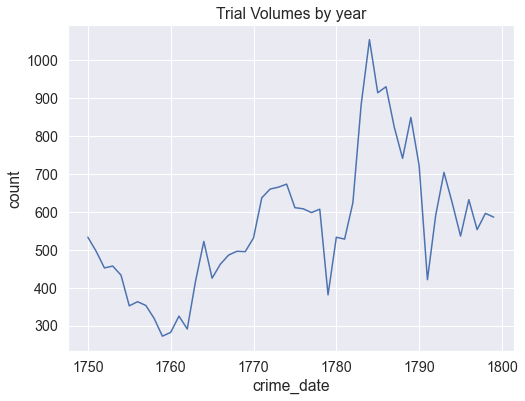

In [29]:
sns.set(font_scale = 1.3)

time_series_crime=df_crime.groupby(df_crime.crime_date.dt.year).agg('offence_category').size()
fig = plt.figure(1, figsize=(8,6))
ax = plt.subplot()
ax.set_xlabel('Year')
ax.set_ylabel('count')
ax.set_title('Trial Volumes by year')

time_series_crime.plot(ax=ax)

We can see there is a spike of trial records in the early 1780s. This could result from 1) trial record keeping practice, i.e. the practice became more thorough 2) there were more crime committed during 1780s. Both are possible explanation. As was mentioned in the introduction of the database, since 1780s, the City had taken over the control of publishing the proceedings. Instead of publishing only certain sentimental crimes, the official records would prefer more comprehensive documentation. In addition, in early industrial revolution, the crime rate increased dramatically (Emsley, 2013), which can also explain the increase of trial records.

In [30]:
#Let's look at different offene cateogries
offence_types=df_crime.offence_category.value_counts()
offence_types

theft            23449
violentTheft      1899
deception          949
kill               485
royalOffences      455
miscellaneous      327
sexual             261
breakingPeace      167
damage              53
Name: offence_category, dtype: int64

<AxesSubplot:title={'center':'Crime Volumes by Category'}, xlabel='Volume', ylabel='Crime'>

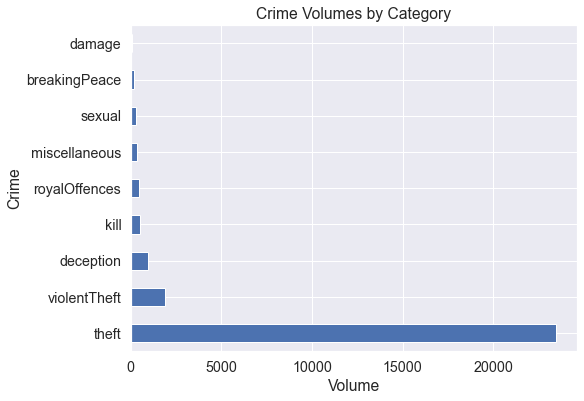

In [31]:
#visualize the crime distribution
fig = plt.figure(1, figsize=(8,6))
ax = plt.subplot()
ax.set_title('Crime Volumes by Category')
ax.set_xlabel('Volume')
ax.set_ylabel('Crime')

offence_types.plot.barh()

In [32]:
#put the crime rate in percentage 
pd.options.display.float_format = '{:.1f}'.format
crime_category=df_crime.groupby(['offence_category']).size()
crime_category=crime_category/len(df_crime)*100 #divide the number of each crime category by the totoal number of trial records
crime_category

offence_category
breakingPeace    0.6
damage           0.2
deception        3.4
kill             1.7
miscellaneous    1.2
royalOffences    1.6
sexual           0.9
theft           83.6
violentTheft     6.8
dtype: float64

<AxesSubplot:title={'center':'Crime Categories by year'}, xlabel='crime_date', ylabel='count'>

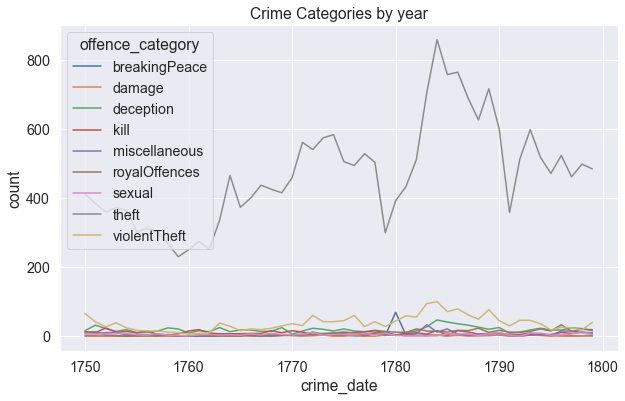

In [33]:
#visualize the change of crime categories through 50 years
year_crime=df_crime.groupby([df_crime.crime_date.dt.year,'offence_category']).size().unstack(level=1)

fig = plt.figure(1, figsize=(10,6))
ax = plt.subplot()
ax.set_xlabel('Year')
ax.set_ylabel('count')
ax.set_title('Crime Categories by year')

year_crime.plot(ax=ax) 

As we can see, 83% of trial records in the 50 years are under the charge of theft. Hence, the line graph above was not particularly useful since we lost the information on how the rest of crime categories changed through years. So let’s exclude theft crimes and plot the line graph again.

<AxesSubplot:xlabel='crime_date', ylabel='count'>

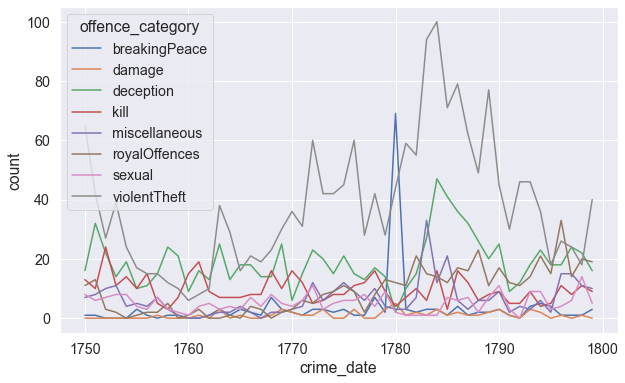

In [34]:
fig = plt.figure(1, figsize=(10,6))

ax = plt.subplot()
ax.set_xlabel('Year')
ax.set_ylabel('count')

year_crime.loc[:, year_crime.columns != 'theft'].plot(ax=ax)

The graph is still a bit messy but we can see few key points. All the crime types have a spike in 1789s. Violenttheft is the second biggest crime categories. The most drastic increases happened in 1780 for the crime of breaking peace.

#### (2) defendant gender and age

In [35]:
df_crime.defendant_gender.value_counts()

male      19909
female     8136
Name: defendant_gender, dtype: int64

It is interesting to notice the gender ratio. There are more than double the number of male than female defendants in this time period. It could result from 1) less women in the British population at the time. Hence, less crime committed by female. 2) less women got arrested/charged. Hence, less trials recorded. It is a complicated issue, which will be addressed later. Since the difference in number of male defendants and female defendants is quite drastic, it will be easier to see a pattern if we normalize the count of each offence_category to a percentage by each gender's total.

In [36]:
gender_crime=pd.crosstab(df_crime['offence_category'],df_crime['defendant_gender'], normalize='columns')
gender_crime=gender_crime*100
gender_crime

defendant_gender,female,male
offence_category,,
breakingPeace,0.1,0.8
damage,0.2,0.2
deception,1.3,4.2
kill,1.2,1.9
miscellaneous,0.4,1.5
royalOffences,1.6,1.6
sexual,0.3,1.2
theft,92.0,80.2
violentTheft,2.9,8.3


In the dataset for both genders, it shows that most women were charged with theft and considerably few in other crime categories (less than 3%). For men, other than 80% charged with theft crimes, there are still 8.3% charged with violent theft and 4.2% with deception. Does this imply that the societal role of males and females at the time related to the types of crime they committed?

In [37]:
#Let's look at defenants' age
df_crime.defendant_age.describe()

count   3006.0
mean      28.8
std       12.7
min        9.0
25%       19.0
50%       25.0
75%       36.0
max       78.0
Name: defendant_age, dtype: float64

In [38]:
#We knew already that there are only 3006 rows with defenants' age recorded
#In order to manipulate the data more easily, we will create a separate dataframe that only contained the rows that with ages values.
df_crime_age=df_crime.copy()
df_crime_age=df_crime_age.dropna(subset=['defendant_age'])

/Users/Yi-Ting/anaconda3/envs/DSM020cw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Yi-Ting/anaconda3/envs/DSM020cw/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, '')]

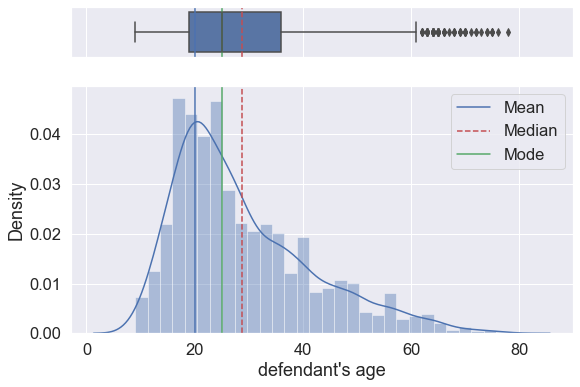

In [39]:
#visualize the distribution of ages with both box plots and historgram and kde plot, with mark on mean, median and mode
sns.set(font_scale =1.5)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(9,6))
mean=df_crime_age['defendant_age'].mean()
median=df_crime_age['defendant_age'].median()
mode=df_crime_age['defendant_age'].mode().to_numpy()[0]

sns.boxplot(df_crime_age['defendant_age'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df_crime_age['defendant_age'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
ax_hist.set_xlabel("defendant's age")

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')

In [40]:
#computing the average age for both male and female defendants
gender_age=df_crime_age.groupby("defendant_gender").agg(mean_age=('defendant_age','mean') )
gender_age

,mean_age
defendant_gender,
female,30.6
male,28.2


We can see most of the defendents are between 20 and 30 years old. The average ages of both male and female defendants are similar. However, let's check the distribution of these records against the year of the trial

In [41]:
pd.options.display.float_format = '{:.0f}'.format
time_age=df_crime_age.groupby((df_crime_age.crime_date.dt.year//10)*10).agg(mean_age=('defendant_age','mean'),size=('trial_id','count'))
time_age                                                                                         

,mean_age,size
crime_date,,
1750,15,12
1760,15,72
1770,15,48
1780,17,132
1790,30,2742


In [42]:
gender_age_crime=pd.crosstab((df_crime_age.crime_date.dt.year//10)*10,df_crime_age['defendant_gender'],values=df_crime_age.defendant_age,aggfunc='mean')
gender_age_crime=time_age.merge(gender_age_crime,on="crime_date")
#this table shows the average year each decade and the average male/female age each decade

We can see the increase in average age of the defendants through each decade. However, as the cell above has shown, in the total 3006 cases, majority of them are in the 1790s and 1780s. The distribution is extremely uneven. It means that the proceeding for 1790s (possibly from 1780s) trials started recording defendants ages more thoroughly.

#### (3) offence category, verdict and punishment

From earlier we know that 83.6% of trial were charged with theft. Hence, if we only look at counts of offence versus punishment, it will be easy to get lost in the numbers. It will be easier to see a pattern if we normalize the count of each punishment_category to a percentage by each offence_category.

In [43]:
#We want to see the number of guilty vs not guilty outcomes for each offence committed"
#create a crosstab table to show offence_category vs. verdict_category and noralized each index
#It means we can see the proporation of for people committed the same crime, what percetage was found guilty/not guilty
offence_verdict=pd.crosstab(df_crime['offence_category'],df_crime['verdict_category'], normalize='index')

#make the number into perentage
offence_verdict= offence_verdict.sort_values(by='guilty')*100

#Rearrange the columns to make sure guilty is next to not guilty. Easier to see
cols = offence_verdict.columns.tolist()
cols = ['guilty','notGuilty', 'specialVerdict', 'miscVerdict']
offence_verdict = offence_verdict[cols]

offence_verdict #print the table

verdict_category,guilty,notGuilty,specialVerdict,miscVerdict
offence_category,,,,
damage,26,70,2,2
sexual,34,66,0,0
breakingPeace,44,56,0,0
deception,46,53,1,0
kill,47,53,0,0
violentTheft,51,49,0,0
royalOffences,53,46,0,0
theft,62,38,0,0
miscellaneous,62,37,1,0


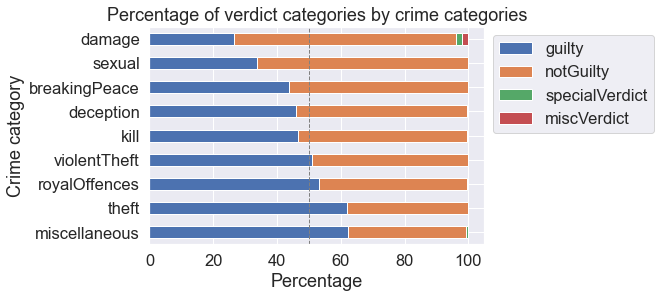

In [44]:
#visualize the table above
ax = offence_verdict.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.set_title('Percentage of verdict categories by crime categories')
ax.set_xlabel('Percentage')
ax.set_ylabel('Crime category')
ax.legend(bbox_to_anchor=(1.0, 1.0))

In [45]:
#We want to see the number of guilty people which received certain punishments based on the offence they committed"
#create a crosstab table to show offence_category vs. punishemnt_category and noralized each index
offence_punishment=pd.crosstab(df_crime['offence_category'],df_crime['punishment_category'],normalize='index')
#show as %
offence_punishment=offence_punishment*100
offence_punishment

punishment_category,corporal,death,imprison,miscPunish,noPunish,transport
offence_category,,,,,,
breakingPeace,0,78,8,10,3,1
damage,0,62,19,6,0,12
deception,2,54,14,3,5,21
kill,0,46,16,36,1,0
miscellaneous,2,63,10,8,4,13
royalOffences,0,28,34,32,4,1
sexual,1,31,24,33,3,7
theft,13,9,13,9,1,54
violentTheft,0,74,4,1,1,20


We can notice that though the conviction of theft charge is the highest (62%), only 9.2% charged with theft were sentenced to death and most were sentenced with transport (transport meant as punishment, criminals were transport to colonies in North America or Australia for indentured services). On the other hand, almost 80% of defendants charged with breaking peace received death sentence (Old Bailey, n.d.). 

#### When the defendants were in trials, did male have higher/same/lower chance to be found guilty than female? 

In the 18th century England justice system that is  solely run by white males, we originally hypothesize that women defendants were not favoured in the system. However, after we inspected the data, it shows a different story.

In [46]:
pd.options.display.float_format = '{:.2f}'.format
verdict_gender=pd.crosstab(df_crime['defendant_gender'],df_crime['verdict_category'], normalize='index')
verdict_gender*100

verdict_category,guilty,miscVerdict,notGuilty,specialVerdict
defendant_gender,,,,
female,55.10,0.00,44.86,0.04
male,61.93,0.01,37.94,0.13


#### Charged with the same crime, is there any difference of punishment that male and female received?
Since there are multiple offence charges, we pick theft as the category to look at.

In [47]:
pd.options.display.float_format = '{:.1f}'.format
#create a separate dataframe to look at theft charges and the punishment 
df_crime_theft_punishment=df_crime.loc[(df_crime['verdict_category'] == "guilty" ) & (df_crime['offence_category'] == "theft" )]
#crosstab the dataframe and normalized the index. 
#It shows how proportion of men/women defendent under theft charge were sentence to various categories. 
theft_punishment_gender=pd.crosstab(df_crime_theft_punishment['defendant_gender'],df_crime_theft_punishment['punishment_category'], normalize='index')
#present in percentage
theft_punishment_gender=theft_punishment_gender*100
theft_punishment_gender

punishment_category,corporal,death,imprison,miscPunish,noPunish,transport
defendant_gender,,,,,,
female,14.9,3.8,19.3,12.3,0.4,49.4
male,12.6,10.5,11.5,7.5,1.7,56.1


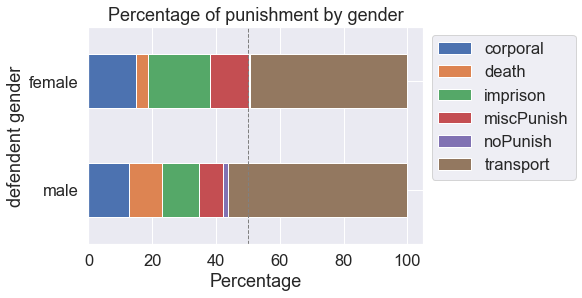

In [48]:
#visualize the table above
ax = theft_punishment_gender.plot.barh(stacked=True)
ax.invert_yaxis()
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.set_title('Percentage of punishment by gender')
ax.set_xlabel('Percentage')
ax.set_ylabel('defendent gender')
ax.legend(bbox_to_anchor=(1.0, 1.0))

We can see from the information  displayed above. Female defendants had about 50-50 chances of being found guilty but male defendants had over 60% chances. Also not good news for male defendants, under the same charge of theft, they have higher chances to receive the death sentence. 

These observations from this time period show that male and female defendants were treated differently in the court but not in the way we expected. The reasons could be situated in the social contexts (Beattie, 1975; Emsley, 2013). Based on their prescribed gender role in the 18th century, men were seen as being more aggressive and violent. On the other hand, crimes conducted by females, were generally perceived as less threatening than the crimes committed by men (Walker, 2003). The crimes committed by women were seen as unusual incidents rather than usual pattern. At this time punishments were used for deterring people from committing crimes. Heavy sentences were not served the purposes. Hence, juries were more reluctant to convict women/or heavy sentence. In addition, pregnant women were usually reprieved from death penalty (Old Bailey, n.d.), which could be one reason why there are smaller proportion of female sentenced to death.

It is also noticed by the scholars who studied the Proceedings of Old Bailey that only 21% of defendants in the entire database are female. Interesting, between 1690 and 1740, 40% of the defendants are female. The percentages dropped after 1740. This could explain the 2:1 ratio in this project's dataset. There have been different theories on why and how it happened. However, though it is the data and trend we observed, it is still hard to draw wider conclusion since we only look at the trial records from ONE court (King, 2006).

### Part 3: Text Analysis
Big parts of the trial records are textual, i.e. the statements made in the courts, which is what we will look at in this part. We will first retrieve the texts from xml and then clean the escape characters like "-,\n". After the cleaning, we will use nltk library to tokenize and lemmatize the words to perform frequency analysis and TF-IDF (term-frequency–inverse document frequency). Details will be discussed below. The last part will be sentiment analysis.

The full dataset we are looking at here is the trials that were related to kill out of 28120 cases.

In [49]:
#write a function to get the texts from the xml and clean the escape characters with regex library. 

def text_process(root):
    
    #the function will run through the xml and get the text. 
    #If the offence category is not kill, the text will return none. 
    #We can drop those later rows 

    texts=None     #set the texts equal to none 
    
    #Get the case id 
    #Later on we can merge with the df_crime dataframe based on id for extra information
    for crime_case_text in root.iter('div1'):
        if crime_case_text.get('type')=="trialAccount":
            trial_id_text=crime_case_text.get('id')
            
    #iter through interp to match the offence category that is equal to kill
    for detail in root.iter('interp'):
        criteria=detail.get('type')
        if criteria=='offenceCategory':
            offence_category = detail.get('value')
            if offence_category == 'kill':
                #get the texts from xml
                texts=ET.tostring(root, encoding='unicode', method='text')
                #clean the texts
                dashes  = re.compile("-")
                quotes = re.compile("''")
                punct = re.compile("""[?!.,;:\]\[(){}`'"]""")
                extranewlines = re.compile('\n\s*\n')
                extraspaces = re.compile('\s\s+')
                texts = dashes.sub('',texts)
                texts = quotes.sub('',texts)
                texts = punct.sub(' ',texts)
                texts = extranewlines.sub('\n',texts)
                texts = extraspaces.sub(' ',texts)
                break 
                
    return trial_id_text, texts

In [50]:
import re
import os

path = "data/"

crime_text=[]

for filename in os.listdir(path):
    # Only get xml files
    if not filename.endswith('.xml'): continue
    fullname = os.path.join(path, filename)
    # This joins the path for each file it files so that python knows the full path / filename to trigger parser
    try:
        tree = ET.parse(fullname) #parse through xml files
        root = tree.getroot() #get the root element
        trial_id_text, texts= text_process(root) #apply the function to retrieve texts and trial_id in the xml
        crime_text.append([trial_id_text, texts])
    except:
        print ("Failed "+filename)


In [51]:
#create a dataframe with case id and the texts
df_crime_text = pd.DataFrame(crime_text, columns=['trial_id','texts'])
df_crime_text

,trial_id,texts
0,t17530607-8,None
1,t17530607-33,None
2,t17530607-27,None
3,t17530607-26,None
4,t17530607-32,None
...,...,...
88,t17530718-43,None
89,t17530718-42,None
90,t17530607-16,None
91,t17530718-7,None


In [52]:
#drop all the null values in the dataframe 
#Afer parsing through the text_process function, 
#the null values in the dataframe are those cases that are not kill charge
df_crime_text_final=df_crime_text.dropna()
df_crime_text_final

,trial_id,texts
43,t17530718-30,345 M William Peears otherwise Pearse was ind...
46,t17530718-33,348 349 M John Stockdale and Christopher John...


The cells above show how we retrieve the texts from xml and clean the texts. However, since the working samples don't cover 28000 xml, in the data folder, "df_crime_text_original.csv" includes the texts and trial id of the killing trial records from the 28000 xmls.  "df_crime_text_original.csv" will be the working document from now on. 

In [53]:
#read the complete csv file
df_crime_text= pd.read_csv('data/df_crime_text_original.csv', index_col=0)

In [54]:
#merge the text dataframe with df_crime 'crime_date' and 'defendant_gender' columns
df_crime_text_gender=df_crime_text.merge(df_crime[['defendant_gender',"crime_date","verdict_category","trial_id"]],on='trial_id')
df_crime_text_gender

,trial_id,texts,defendant_gender,crime_date,verdict_category
0,t17790915-57,440 GEORGE LISTER was indicted for the Wilful...,male,1779-09-15,notGuilty
1,t17810222-9,131 PATRICK HOY was indicted for the wilful m...,male,1781-02-22,notGuilty
2,t17611021-34,318 M Richard Parrott was indicted for the wi...,male,1761-10-21,guilty
3,t17801206-54,64 THOMAS DILLEY was indicted for the wilful ...,male,1780-12-06,notGuilty
4,t17540717-45,393 L Bernard Smith was indicted for the wilf...,male,1754-07-17,guilty
...,...,...,...,...,...
481,t17940917-47,506 ROBERT ANDREWS was indicted for that he o...,male,1794-09-17,guilty
482,t17871024-19,830 WILLIAM WHITEWAY was indicted for that he...,male,1787-10-24,notGuilty
483,t17760417-58,366 MARY OWEN late wife of Henry Owen was ind...,female,1776-04-17,notGuilty
484,t17501205-60,75 M Henry Stroud was indicted for the murder...,male,1750-12-05,guilty


In [55]:
import nltk #for tokenize and process the texts
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from collections import Counter

In [56]:
#stop words: the most common words in language
#usually filter out before processing texts
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
print (stop_words)
#We add "q" to the stopwrods list. 
stop_words.append('q')#this is for the "Q:", occured a lot in the trial data as questions

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /Users/Yi-Ting/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Yi-
[nltk_data]     Ting/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Yi-Ting/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
#create a funtion to tokenize the words, remove stopwords and lemmatize the words
def text_analysis (texts):
    texts=texts.lower() #make the texts lower case
    tokens=word_tokenize(texts) #tokenize the words
    tokens=[token for token in tokens if token not in stop_words] #remove stopwords
    lemma=nltk.wordnet.WordNetLemmatizer() #create a lemmatizer
    texts=[lemma.lemmatize (token) for token in tokens if token not in stop_words] #lemmatization words
    return texts

In the natural language process, we want the program to be able to tell that "dance" and "danced" are actually the same words but in different tenses. This means we need to get the core root of this vocabulary. There are two ways of doing it: stemming and lemmatization. In this project we decide to use lemmatization instead of stemming.

Stemming means reducing words to their stems, like the stem of "cooking" is "cook". However it is also easy to over-stem, especially for nouns. Snowballstemmer in nltk is commonly used for this task. We originally use snowballstemmer but as an example the word "uncles" became "uncl", "properties" became "properti"(Heidenreich, 2018). The words just do not make sense and are not really useful. Hence, we start looking at lemmatization. Lemmatization is more complex than rule-based stemming. It takes words to their dictionary form. So when we pass through "uncles", it returns "uncle". Examples are in the following cell.

In [58]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("uncles"))
lemma = nltk.wordnet.WordNetLemmatizer()
print(lemma.lemmatize("uncles"))

uncl
uncle


In [59]:
#apply the function to process the texts in a separate column
#keep the original texts for sentiment analysis
df_crime_text_gender['nltk_texts'] = df_crime_text_gender['texts'].apply(lambda x: text_analysis(x))
df_crime_text_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trial_id          486 non-null    object        
 1   texts             486 non-null    object        
 2   defendant_gender  486 non-null    category      
 3   crime_date        486 non-null    datetime64[ns]
 4   verdict_category  486 non-null    category      
 5   nltk_texts        486 non-null    object        
dtypes: category(2), datetime64[ns](1), object(3)
memory usage: 20.3+ KB


In [60]:
#change the datatype
df_crime_text_gender['texts']=df_crime_text_gender['texts'].astype('str')

In [61]:
#calculate the length of each trial records
df_crime_text_gender['length']=df_crime_text_gender['texts'].apply(lambda texts: len(texts))
df_crime_text_gender['length']

0      11953
1      13606
2      21161
3       1526
4       7438
       ...  
481    14228
482    22670
483     8625
484     6403
485    16575
Name: length, Length: 486, dtype: int64

In [62]:
pd.options.display.float_format = '{:.0f}'.format
#calculate the average lengths of trials between female and male defendents
df_crime_text_gender.groupby('defendant_gender').mean('length')

,length
defendant_gender,
female,14168
male,16434


In [63]:
pd.options.display.float_format = '{:.0f}'.format
#see if the length of trial records change through time
decade_length=df_crime_text_gender.groupby((df_crime_text_gender.crime_date.dt.year//10)*10).agg(length=('length','mean'),count=('trial_id','count'))
decade_length                                                                               

,length,count
crime_date,,
1750,9943,113
1760,16287,106
1770,11901,103
1780,21968,88
1790,23014,76


<AxesSubplot:title={'center':'Trial length change through years'}, xlabel='crime_date', ylabel='length of trial text (characters)'>

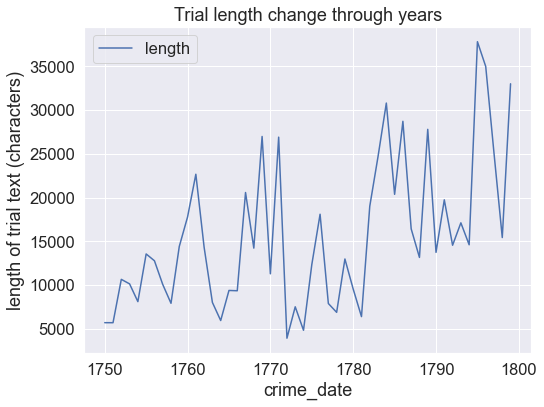

In [64]:
#visualize the change through time
time_year_length=df_crime_text_gender.groupby(df_crime_text_gender.crime_date.dt.year).mean('length')

fig = plt.figure(1, figsize=(8,6))
ax = plt.subplot()
ax.set_xlabel('Year')
ax.set_ylabel('length of trial text (characters)')
ax.set_title('Trial length change through years')

time_year_length.plot(ax=ax)

We can see that the trial records for male defendants are slightly longer than the male defendants but it is difficult to draw conclusions from that. We can also see the length of text in the trials of is getting longer in the timeframe we are looking at. This makes sense since later in the 1780s, when the City takes over the publication of Proceedings, the proceedings become more comprehensive.

### TF-IDF
TF-IDF stands for term frequency-inverse document frequency. It is a technique to quantify words in documents. We compute each word with a score that can signify the importance of words in the document or corpus. It can provide more information then simple frequency analysis. TF-IDF analysis is used in this project to see if we can uncover any useful information in the trial records (Scott, 2019). 

TF-IDF is calculated by **Term Frequency (TF) * Inverse Document Frequency (IDF)** 

Term frequency (TF) measures the frequency of a word in a document. The calculation is simple. 

**TF=Counts of the word in the document/total number of words in the document**

So it means the most common words like "the" or "was", will have higher values

Document frequency (DF) measures the occurrence of the term in a set of documents. In other words, DF means numbers of documents that a term was present in. Inverse document frequency quantifies the informativeness of the term by dividing number of documents by DF and taking the log of the value. Put in the formula will be:

**IDF=log(number of the documents/DF+1)**

The reason that we need to add +1 at the denominator is because there is a chance that the term doesn't appear in any document, the DF will be 0. So for common practice, we add +1 to avoid dividing 0.

#### Calculate the TF-IDF of female's trial texts

In [65]:
#create an empty string  
female=''

#iter through the dataframe 
for x in range(0,len(df_crime_text_gender)): 
    #check the defendant gender. If it is female, append the text to the string
    if df_crime_text_gender['defendant_gender'][x] =='female':
        female += df_crime_text_gender['texts'][x] 

female=[female] #turn it into a list to put TfidfVectorizer


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer #import the library

In [67]:
#We decide to use sklearn library. They compressed the operation above on calculating TF-IDF into few lines
tfidf_vectorizer_female = TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors_female=tfidf_vectorizer_female.fit_transform(female)

In [68]:
# place tf-idf values in a pandas data frame 
df_female_tfidf = pd.DataFrame(tfidf_vectorizer_vectors_female.T.todense(), index=tfidf_vectorizer_female.get_feature_names(), columns=["tfidf"]) 
df_female_tfidf.sort_values(by=["tfidf"],ascending=False).head(5)

,tfidf
the,1
and,0
was,0
to,0
of,0


#### Calculate the TF-IDF of male's trial texts

In [69]:
#Same procedures used for analyzing femle's texts will be used here for male's texts
male=''
for x in range(0,len(df_crime_text_gender)): 
    if df_crime_text_gender['defendant_gender'][x] =='male':
        male += df_crime_text_gender['texts'][x] 
male=[male]

In [70]:
tfidf_vectorizer_male = TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors_male=tfidf_vectorizer_male.fit_transform(male)

In [71]:
df = pd.DataFrame(tfidf_vectorizer_vectors_male.T.todense(), index=tfidf_vectorizer_male.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False).head(5)

,tfidf
the,1
and,0
to,0
of,0
was,0


If the tf-idf score of the term is higher, the more relevant of term is to the whole document. The most interesting part came out from the analysis is that the word "child" is in the top 5 for the tf-idf scores in the female defendants' trial records. This makes sense since women tend to be charged with infanticide (as a subcategory of killing). Infanticide means the killing of a new born child. The crimes usually involved unmarried women. 

### Sentiment analysis
Sentiment analysis is a part of NLP that tries to identify opinions within texts, ‘computationally’ determining whether the text is positive, negative or neutral. This project used VADER (Valence Aware Dictionary and sEntiment Reasoner) for sentiemnt analysis. It is a lexicon and rule-based sentiment analysis tool. The advantage of this VADER does not require training data. VADER is usually used in social-media posts analysis. 

In [72]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer() #load the analyzer

[nltk_data] Downloading package vader_lexicon to /Users/Yi-
[nltk_data]     Ting/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
#apply the analyzer to the each rows in the "texts" column
sentiment = df_crime_text_gender['texts'].apply(lambda x : sid.polarity_scores(x))

In [74]:
pd.options.display.float_format = '{:.3f}'.format
#concat the series back to the dataframe
df_crime_text_gender_sentiment=pd.concat([df_crime_text_gender,sentiment.apply(pd.Series)],1)
df_crime_text_gender_sentiment

,trial_id,texts,defendant_gender,crime_date,verdict_category,nltk_texts,length,neg,neu,pos,compound
0,t17790915-57,440 GEORGE LISTER was indicted for the Wilful...,male,1779-09-15,notGuilty,"[440, george, lister, indicted, wilful, murder...",11953,0.147,0.825,0.029,-1.000
1,t17810222-9,131 PATRICK HOY was indicted for the wilful m...,male,1781-02-22,notGuilty,"[131, patrick, hoy, indicted, wilful, murder, ...",13606,0.101,0.838,0.060,-0.999
2,t17611021-34,318 M Richard Parrott was indicted for the wi...,male,1761-10-21,guilty,"[318, richard, parrott, indicted, wilful, murd...",21161,0.147,0.808,0.045,-1.000
3,t17801206-54,64 THOMAS DILLEY was indicted for the wilful ...,male,1780-12-06,notGuilty,"[64, thomas, dilley, indicted, wilful, murther...",1526,0.119,0.843,0.039,-0.977
4,t17540717-45,393 L Bernard Smith was indicted for the wilf...,male,1754-07-17,guilty,"[393, l, bernard, smith, indicted, wilful, mur...",7438,0.185,0.766,0.049,-1.000
...,...,...,...,...,...,...,...,...,...,...,...
481,t17940917-47,506 ROBERT ANDREWS was indicted for that he o...,male,1794-09-17,guilty,"[506, robert, andrew, indicted, 17th, august, ...",14228,0.115,0.824,0.061,-1.000
482,t17871024-19,830 WILLIAM WHITEWAY was indicted for that he...,male,1787-10-24,notGuilty,"[830, william, whiteway, indicted, ill, design...",22670,0.097,0.841,0.062,-1.000
483,t17760417-58,366 MARY OWEN late wife of Henry Owen was ind...,female,1776-04-17,notGuilty,"[366, mary, owen, late, wife, henry, owen, ind...",8625,0.157,0.779,0.063,-1.000
484,t17501205-60,75 M Henry Stroud was indicted for the murder...,male,1750-12-05,guilty,"[75, henry, stroud, indicted, murder, richard,...",6403,0.131,0.831,0.037,-0.999


We can see there are four columns produced by the sentiment analysis. Individually, they are respresent four different kinds of sroes. Pos (positive), neu (neutral), and neg (negative) scores are the ratio of proportions of text in each category. The compound score is to sum up the valence scores of each word in the lexicon and then normalize to be between -1 (most extreme negative) and +1 (most extreme positive). According to the documentation, as a general rule for researchers:

**positive sentiment => compound score >=0.5**

**neutral sentiment => -0.5 < compound score <0.5**

**negative sentiment => compound score <= -0.05**

(Link to the documentation:https://github.com/cjhutto/vaderSentiment#about-the-scoring)

<AxesSubplot:title={'center':'Compound score distribution'}, xlabel='Compound Score', ylabel='Frequency'>

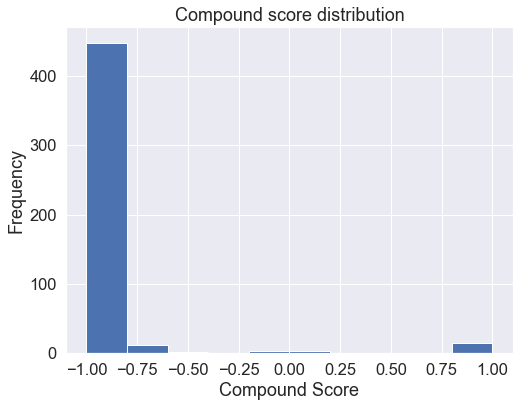

In [75]:
#visualize the distribution of compound scores
fig = plt.figure(1, figsize=(8,6))
ax = plt.subplot()
ax.set_xlabel('Compound Score')
ax.set_title('Compound score distribution')

df_crime_text_gender_sentiment['compound'].plot(kind='hist')

In [76]:
#See the average of sentiment scores by each gender
df_crime_text_gender_sentiment.groupby('defendant_gender').mean('compound')

,length,neg,neu,pos,compound
defendant_gender,,,,,
female,14168.178,0.121,0.823,0.057,-0.903
male,16433.945,0.134,0.806,0.060,-0.898


In [77]:
#See the average of sentiment scores by each verdict category
df_crime_text_gender_sentiment.groupby('verdict_category').mean('compound')

,length,neg,neu,pos,compound
verdict_category,,,,,
guilty,16839.502,0.134,0.807,0.058,-0.931
miscVerdict,NaN,NaN,NaN,NaN,NaN
notGuilty,15167.977,0.129,0.811,0.060,-0.869
specialVerdict,18659.000,0.099,0.833,0.068,-0.995


We can see from the plot above, the majority of trial records are identified with negative sentiment. It makes sense given it was in a criminal context (especially we are looking at killing trials). We would like to see if there is any difference between male and female defendants' records and different verdict categories (i.e. not guilty category might more toward positive sentiment). However, as the information displayed above, there are no noticable difference. They all get negative sentiment scores. 

### Discussion and Summary

Analysing the data from Old Bailey digital archive, the project is aimed to investigate the treatments of male and female defendants in the late 18th century English justice system. A lot of interesting information was uncovered.

In the 50 year period we are looking at, from the dataset we successfully address the research questions and found out:

(1) Female and male defendants were treated differently. Male defendants were more likely to be sentenced as guilty and (under theft charge) more likely to receive death sentence than women.

(2) Female defendants mainly committed theft crimes while male defendants committed a wider range of crimes

(3) The average ages of defendants for both gender increased in the 50 years but this could be caused by the skewed sample distributions

(4) TF-IDF analysis identified the importance of "child" in female defendant's trials, which can be supported by the fact that women were often charged with Infanticide.

Other than successfully answering research questions, we also characterize a few features from the dataset, which can inform us on the general trends in the time period and the trial record keeping practices:

(1) Majority of the trials are under the crime category of theft.

(2) There is a sharp spike in the number of trials in 1780s. The crime of "breaking peace" increased most drastically during that time.

(3) The length of the trials written text were getting longer.

(4) From 1780s and 1790s, the record keeping became more comprehensive since we see there are more records at that time recorded
    
Combing the observations from the dataset and historical research/documents, differences of the treatment of male and female defendants in the court largely resulted from how the society perceived them and the justice systems looked at them through the glasses of prescribed gender roles, such as "Women are weak and vulnerable". Women at that point were also seen as part of men's property as well (Arnot and Usborne, 1999; Palk, 2006; Shoemaker, 1998). **In the late 18th century, though women might have suffered inequalities in factories or politics, the prejudices about them actually played in their favour when they were in the courtroom.** 

### Conclusion and Future Directions

From this 50 years dataset, we have identified the gender differene in the 18th century courtroom (as defendants). There are still more information can be drawn from this dataset and the whole Proceedings of Old Bailey digital archive. However we need to understand more in details on the processes of creating trial reports before 1800. It was pointed out that the 19th century trial records reflect more accurate on the courtroom practice (Hitchcock et al., 2016).

There are few aspects that we can exapnd for the futures on this dataset:

(1) Expanding the time period. If the 17th century record keeping were more sensational (for attracting readers), the setiment analysis might show the difference comparing with what we get from current dataset. 

(2) Including the parameters of victims. We have seen how male and female defendants representing in the court. It will be interesting to see the  similar representation of vitims

(3) Bayesian hypothesis tests. Unlike frequentist approach (simply reject or accept a hypothesis), we can use bayesian approach to calculate the range of probilities of the likelyhood that male/female defendants would be found guilty.  


### Reference

Arnot, Meg, & Usborne, Cornelie. (1999). Gender and Crime in Modern Europe (Women's and gender history). London: Taylor & Francis Group.

Beattie, J. M. (1975). The Criminality of Women in Eighteenth-Century England. Journal of Social History, 8(4), 80-116.

Deane, P. (1979). The first industrial revolution. S.l.]: Cambridge University Press.

Devereaux, S. (1996). The City and the Sessions Paper: “Public Justice” in London, 1770–1800. The Journal of British Studies, 35(4), 466-503.

Emsley, C. (2013). Crime and society in England 1750-1900. (Themes in British social history). S.l.]: Longman.

Heidenreich, H. (2018, December 21) Stemming? Lemmatization? What?.Medium. https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8

Hitchcock, Tim, & Turkel, William J. (2016). The Old Bailey Proceedings, 1674–1913: Text Mining for Evidence of Court Behavior. Law and History Review, 34(4), 929-955.

Hudson, P. (2014). The industrial revolution (Reading history). London ; New York : New York, NY: E. Arnold ; Distributed in the USA by Routledge, Chapman, and Hall.

Kermode, Jennifer, & Walker, Garthine. (2004). Women Crime and the Courts in Early Modern England. London: Routledge.

King, P. (2006). Crime and law in England, 1750-1840. (Past and present publications). Cambridge: CUP.

Old Bailey (2018) https://www.oldbaileyonline.org/static/Gender.jsp#genderroles

Palk, D. (2006). Gender, Crime and Judicial Discretion 1780–1830. London: Royal Historical Society

Scott, W. (2019) TF-IDF from scratch in python on real world dataset. Medium. https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

Shoemaker, R. (2008). Gender in English society, 1650-1850 : The emergence of separate spheres? (Themes in British social history).

Walker, G. (2003). Crime, gender and social order in early modern England (Cambridge studies in early modern British history). Cambridge: Cambridge University Press.